#1. Read the data for Amazon and Google stores

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

am_goo_train_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/gs_train.csv")
am_goo_train_recs = am_goo_train_df.to_dict('records')

am_goo_val_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/gs_val.csv")
am_goo_val_recs = am_goo_val_df.to_dict('records')

am_goo_test_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/gs_test.csv")
am_goo_test_recs = am_goo_test_df.to_dict('records')

amazon_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/1_amazon.csv",  encoding = "ISO-8859-1")
amazon_recs = amazon_df.to_dict('records')

google_df = pd.read_csv("/content/drive/MyDrive/ML/data/amazon_google/2_google.csv",  encoding = "ISO-8859-1")
google_recs = google_df.to_dict('records')

amazon_id_to_rec_map = {a['subject_id']: a for a in amazon_recs}
google_id_to_rec_map = {b['subject_id']: b for b in google_recs}

len(am_goo_train_recs), len(am_goo_val_recs), len(am_goo_test_recs), len(amazon_recs), len(google_recs)

(5908, 1696, 836, 1113, 1291)

In [ ]:
amazon_df.head(10)

,subject_id,name,description,manufacturer,price
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),NaN,broderbund,0.00
1,b00004tkvy,noah's ark activity center (jewel case ages 3-8),NaN,victory multimedia,0.00
2,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99
3,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99
4,b00021xhzw,adobe after effects professional 6.5 upgrade f...,upgrade only; installation of after effects st...,adobe,499.99
5,b0000dbykm,mia's math adventure: just in time,in mia's math adventure: just in time children...,kutoka,19.99
6,b00029bqa2,disney's 1st & 2nd grade bundle (pixar 1st gra...,disney's 1st & 2nd grade bundle will help your...,disney,14.99
7,b0007prnjo,paper art: gift wrapping,how many times have you heard that it's the th...,arc media inc.,0.00
8,b000i82j80,spy sweeper spanish,NaN,webroot software,29.95
9,b000in6u62,omnioutliner professional 3.0,NaN,csdc,69.95


In [ ]:
google_df.head(10)

,subject_id,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
2,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99
3,http://www.google.com/base/feeds/snippets/1231...,video studio 11 plus,corel video studio 11 plus is consumer video e...,corel corporation,103.99
4,http://www.google.com/base/feeds/snippets/1283...,qb pos 6.0 pro multi store sw,qb pos 6.0 pro multistore retail mngmt softwar...,intuit,1054.99
5,http://www.google.com/base/feeds/snippets/1294...,qb credit card kit 3.0,quickbooks credit card kit v3.0 (2007),intuit,25.99
6,http://www.google.com/base/feeds/snippets/1299...,vegas movie studiodvd+8 plat,sony media software vegas movie studio +dvd 8 ...,sony creative software,92.99
7,http://www.google.com/base/feeds/snippets/1339...,qb pos 6.0 pro solution hw/sw,qb pos 6.0 pro solution hw/sw. ships in an unp...,intuit,1474.99
8,http://www.google.com/base/feeds/snippets/1056...,evergirl: pc cd-rom video game,based on the tween lifestyle brand launched in...,NaN,14.99
9,http://www.google.com/base/feeds/snippets/1355...,902453-007-b rumba unix-hp edition - upgrade l...,netmanage 902453-007-b : usually ships in 24 h...,NaN,147.73


In [ ]:
am_goo_train_df.head()

,source_id,target_id,matching
0,b0001wn1ee,http://www.google.com/base/feeds/snippets/9255...,False
1,b000g80lku,http://www.google.com/base/feeds/snippets/1531...,False
2,b000070ilx,http://www.google.com/base/feeds/snippets/1575...,False
3,b000ub6avc,http://www.google.com/base/feeds/snippets/9526...,False
4,b000cc22ys,http://www.google.com/base/feeds/snippets/1024...,False


##1.1 Data exploration

Positive to all ratio for train, val and test:

In [19]:
train_pos = (am_goo_train_df['matching'] == True).sum()
val_pos = (am_goo_val_df['matching'] == True).sum()
test_pos = (am_goo_test_df['matching'] == True).sum()
train_pos, train_pos/len(am_goo_train_recs), val_pos, val_pos/len(am_goo_val_recs), test_pos, test_pos/len(am_goo_test_recs)

(909, 0.1538591740013541, 261, 0.15389150943396226, 128, 0.15311004784688995)

- 15% of data point has positive matching across the training, val and test sets

In [23]:
#price
am_price_miss = (amazon_df['price'] == 0.0).sum() / amazon_df.shape[0]
goo_price_miss = (google_df['price'] == 0.0).sum() / len(google_df)
am_price_miss, goo_price_miss

(0.11320754716981132, 0.0)

- 11% amazon records and 0% google recs lack price info

In [30]:
#description
am_descr_miss = (amazon_df['description'].isnull()).sum() / len(amazon_df)
goo_descr_miss = ((google_df['description'].isnull()).sum() + len(google_df[google_df['description'] == 'no description available'])) / len(google_df)
am_descr_miss, goo_descr_miss

(0.08715184186882301, 0.03640588690937258)

- 8% of amazon records and 3.6% of google records dont have description

In [32]:
#manufacturer
am_man_miss = (amazon_df['manufacturer'].isnull()).sum() / len(amazon_df)
goo_man_miss = (google_df['manufacturer'].isnull()).sum() / len(google_df)
am_man_miss, goo_man_miss

(0.0, 0.9147947327652982)

- No amazon records lack manufactuer and 91% google recs don't have manufacturer info

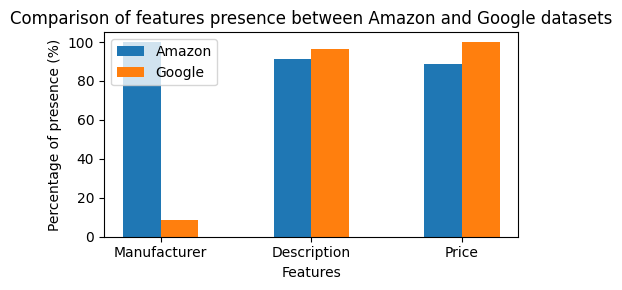

In [ ]:
import matplotlib.pyplot as plt

# Data
datasets = ['Amazon', 'Google']
features = ['Manufacturer', 'Description', 'Price']
am_values = [(1-am_man_miss)*100, (1-am_descr_miss)*100, (1-am_price_miss)*100]
goo_values = [(1-goo_man_miss)*100, (1-goo_descr_miss)*100, (1-goo_price_miss)*100]

# Bar width
bar_width = 0.25

# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 3))

# Plotting the data
am_bars = ax.bar(
    [i - bar_width/2 for i in range(len(features))],
    am_values,
    bar_width,
    label='Amazon'
)
goo_bars = ax.bar(
    [i + bar_width/2 for i in range(len(features))],
    goo_values,
    bar_width,
    label='Google'
)

# Adding labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Percentage of presence (%)')
ax.set_title('Comparison of features presence between Amazon and Google datasets')
ax.set_xticks([i for i in range(len(features))])
ax.set_xticklabels(features)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
amazon_df['name_len'] = amazon_df['name'].apply(lambda x: len(x.split(' ')))
google_df['name_len'] = google_df['name'].apply(lambda x: len(x.split(' ')))
am_name_df = amazon_df['name_len'].value_counts().sort_index()
goo_name_df = google_df['name_len'].value_counts().sort_index()

In [ ]:
from plotly import graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=am_name_df.index,
    y=am_name_df.values,
    name='Amazon',
    fill='tozeroy'
))
fig.add_trace(go.Scatter(
    x=goo_name_df.index,
    y=goo_name_df.values,
    name='Google',
    fill='tozeroy'
))


fig.update_layout(
    title='Distribution of product name lengths',
    xaxis_title='Length of product name',
    yaxis_title='Number of titles of given length'
)
fig.update_xaxes(range=[0, 40])
fig.show()

#2. Apply Sentence-Transformers embeddings + ScaNN Search

In [ ]:
!pip install transformers sentence_transformers scann

In [ ]:
def get_description(rec):
    descr_missing = pd.isna(rec['description']) or rec['description'] == 'no description available'
    description = f" Description: {rec['description']}." if not descr_missing  else ''
    name = rec['name']

    if rec['manufacturer']:
        manf = str(rec['manufacturer']) if not pd.isna(rec['manufacturer']) else ''
        name = rec['name'] if manf in rec['name'] else f"{manf} {rec['name']}"

    price = 'unknown' if np.isnan(rec['price']) or rec['price'] == 0.0 else rec['price']

    return f"""The name of the product is {name}.{description} The price is {price}."""

In [ ]:
print(get_description(amazon_recs[1]))

The name of the product is victory multimedia noah's ark activity center (jewel case ages 3-8). The price is unknown.


In [ ]:
get_description(google_recs[10]), google_recs[10]

('The name of the product is channel sources distribution co mlw6.0 checkmark multiledger for pc/mac. The price is 294.58.',
 {'subject_id': 'http://www.google.com/base/feeds/snippets/11635339528486156141',
  'name': 'channel sources distribution co mlw6.0 checkmark multiledger for pc/mac',
  'description': 'no description available',
  'manufacturer': 'channel sources distribution co',
  'price': 294.58})

In [ ]:
from search import Searcher

config = {
    'model_name': 'sentence-transformers/all-mpnet-base-v2',
    'mappings': am_goo_test_recs,
    'db_recs': amazon_recs,
    'search': {
        'candidates_len': 10,
    },
    'description_fn': get_description
}
searcher = Searcher(config)

In [ ]:
query_test_recs = [ google_id_to_rec_map[a['target_id']] for a in am_goo_test_recs]
searcher.embed_and_search(query_test_recs)
len(searcher.db_embeddings), len(searcher.query_embeddings)

Generate descriptions for all 1113 products
Generating embeddings for 1024 descriptions
Generate descriptions for all queries
Init search engine...
10 200 50
Searching to 10 candidates for test queries...
Neighbors len: 836


(1113, 836)

In [ ]:
predictions = searcher.get_predictions_for_top_ks()
metrics_base = searcher.get_metrics(predictions)


For base pre-trained emebeddings recall@1 is just 60%.

In [ ]:
metrics_base

[{'False': {'precision': 0.9314516129032258,
   'recall': 0.9788135593220338,
   'f1-score': 0.9545454545454545,
   'support': 708},
  'True': {'precision': 0.8369565217391305,
   'recall': 0.6015625,
   'f1-score': 0.7000000000000001,
   'support': 128},
  'accuracy': 0.9210526315789473,
  'macro avg': {'precision': 0.8842040673211782,
   'recall': 0.7901880296610169,
   'f1-score': 0.8272727272727273,
   'support': 836},
  'weighted avg': {'precision': 0.9169834649737949,
   'recall': 0.9210526315789473,
   'f1-score': 0.9155719878207916,
   'support': 836}},
 {'False': {'precision': 0.9590973201692524,
   'recall': 0.96045197740113,
   'f1-score': 0.959774170783345,
   'support': 708},
  'True': {'precision': 0.7795275590551181,
   'recall': 0.7734375,
   'f1-score': 0.776470588235294,
   'support': 128},
  'accuracy': 0.9318181818181818,
  'macro avg': {'precision': 0.8693124396121852,
   'recall': 0.866944738700565,
   'f1-score': 0.8681223795093196,
   'support': 836},
  'weighte

### Error analysis

In [ ]:
goo_test_recs = [ google_id_to_rec_map[a['target_id']] for a in am_goo_test_recs]
k = 1
wrongs_true1 = []
for i, p in enumerate(predictions):
  if am_goo_test_recs[i]['matching'] and not p[str(k)]:
    wrongs_true1.append((i, goo_test_recs[i], amazon_id_to_rec_map[am_goo_test_recs[i]['source_id']], amazon_recs[searcher.neighbors[i][0]])) #take first prediction
len(wrongs_true1), wrongs_true1[:5]

(54,
 [(14,
   {'subject_id': 'http://www.google.com/base/feeds/snippets/16873990150005697074',
    'name': 'migo software digital vault 2005',
    'description': 'digital vault 2005 will encrypt your files and folders using 256 bit encryption. digital vault 2005 makes it virtually impossible for hackers internet thieves and associates from getting to your personal information. you can encrypt files and ...',
    'manufacturer': nan,
    'price': 24.58},
   {'subject_id': 'b000ar96bm',
    'name': 'digital vault',
    'description': "with digital vault you have the safety and secuirty you need for more confident web surfing. don't worry about snoopers or identity thieves taking your personal information -- this software will have it under lock and key.",
    'manufacturer': 'stompsoft inc.',
    'price': 29.99},
   {'subject_id': 'b000ccvp0a',
    'name': 'simply put software data eliminator',
    'description': 'data eliminator removes all information from computer hard drives. it mak

Pretrained Sentence transformed is not sensitive to exact model names, like KXTSC14B but rather just to general descriptions being similar.

#3. Fine-tune Sentence transformers on train + val pairs

### Multiple Negative Ranking Loss

In [ ]:
pairs_pos_train = [(amazon_id_to_rec_map[ab["source_id"]], google_id_to_rec_map[ab["target_id"]]) for ab in am_goo_train_recs + am_goo_val_recs if ab['matching']]
pairs_neg_train = [(amazon_id_to_rec_map[ab["source_id"]], google_id_to_rec_map[ab["target_id"]]) for ab in am_goo_train_recs + am_goo_val_recs if not ab['matching']]

description_pos = [(get_description(a), get_description(b)) for a, b in pairs_pos_train]
description_neg = [(get_description(a), get_description(b)) for a, b in pairs_neg_train]

In [ ]:
description_pos[10], len(description_pos)

(('The name of the product is microsoft software microsoft windows small business server cal 2003 license pack 20 client addpack device. Description: sbs cal 03 20 clt adpk devi. The price is unknown.',
  "The name of the product is nan windows sbs cal 2003 20-clt addpak device cal - microsoft - t74-00003. Description: small businesses are doing more with less in today's business environment. information technology (it) professionals can help small businesses do more by deploying windows small business server 2003 to provide security-enhanced reliable it .... The price is 1413.42."),
 1170)

In [ ]:
from search import Searcher
from sentence_transformers import losses

config = {
    'model_name': 'sentence-transformers/all-mpnet-base-v2',
    'mappings': am_goo_test_recs,
    'db_recs': amazon_recs,
    'search': {
        'candidates_len': 10,
     },
    'description_fn': get_description,
    'train': {
        'epochs': 20,
        'batch_size': 16,
        'loss': losses.MultipleNegativesRankingLoss
    }

}
searcher = Searcher(config)

Loading sentence-transformers/all-mpnet-base-v2...


In [ ]:
searcher.fine_tune_embeddings(description_pos)
query_test_recs = [ google_id_to_rec_map[a['target_id']] for a in am_goo_test_recs]
searcher.embed_and_search(query_test_recs)

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/74 [00:00<?, ?it/s]

Iteration:   0%|          | 0/74 [00:00<?, ?it/s]

Iteration:   0%|          | 0/74 [00:00<?, ?it/s]

Iteration:   0%|          | 0/74 [00:00<?, ?it/s]

Generate descriptions for all 1113 products
Generating embeddings for 1024 descriptions
Generate descriptions for all queries
Init search engine...
10 200 50
Searching to 10 candidates for test queries...
Neighbors len: 836


Predict matchings:

In [ ]:
predictions = searcher.get_predictions_for_top_ks()
metrics_mnrl = searcher.get_metrics(predictions)

Fine-tuning the embeddings increased recall@1 by **30%**!

In [ ]:
metrics_mnrl

[{'False': {'precision': 0.9846368715083799,
   'recall': 0.9957627118644068,
   'f1-score': 0.9901685393258426,
   'support': 708},
  'True': {'precision': 0.975,
   'recall': 0.9140625,
   'f1-score': 0.9435483870967741,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9798184357541899,
   'recall': 0.9549126059322034,
   'f1-score': 0.9668584632113084,
   'support': 836},
  'weighted avg': {'precision': 0.9831613696506374,
   'recall': 0.9832535885167464,
   'f1-score': 0.9830305255874207,
   'support': 836}},
 {'False': {'precision': 0.9985074626865672,
   'recall': 0.9449152542372882,
   'f1-score': 0.9709724238026125,
   'support': 708},
  'True': {'precision': 0.7650602409638554,
   'recall': 0.9921875,
   'f1-score': 0.8639455782312925,
   'support': 128},
  'accuracy': 0.9521531100478469,
  'macro avg': {'precision': 0.8817838518252112,
   'recall': 0.968551377118644,
   'f1-score': 0.9174590010169525,
   'support': 836},
  'weighted avg': {

#4. Fine-tune Sentence transformers on *augmented* train + val pairs

##4.1. Data Augmentation

In [ ]:
!pip install nlpaug transformers

In [ ]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import random

def define_augmenter():
    np.random.seed(42)

    stopwords = ['name', 'product', 'description', 'price']
    aug_arr = []
    aug_arr.append(naw.ContextualWordEmbsAug(aug_p = 0.1, action='substitute', top_k = 5, aug_min=0, aug_max = 3, stopwords=stopwords))
    aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='crop', aug_min=0, aug_max = 3))
    aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='swap', aug_min=0, aug_max = 5, stopwords=stopwords))
    aug_arr.append(naw.RandomWordAug(aug_p = 0.1, action='delete', aug_min=0, aug_max = 4,  stopwords=stopwords))
    aug_arr.append( nac.RandomCharAug(aug_char_p=0.1, action='swap', aug_char_min =0, aug_char_max=3, include_numeric=False))
    aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='delete', aug_char_min =0, aug_char_max=4))
    aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='insert', aug_char_min =0, aug_char_max=4, include_numeric=False))
    aug_arr.append(nac.RandomCharAug(aug_char_p=0.1, action='substitute', aug_char_min =0, aug_char_max=4, include_numeric=False))

    return aug_arr

aug_arr = define_augmenter()


In [ ]:
sent = 'An apple a day keeps the doctor away'
aug_arr[0].augment(sent)[0], aug_arr[4].augment(sent)[0]

('an apple a day sent the doctor away', 'An apple a day keeps the dcotor awya')

In [ ]:
pairs_pos_train = [(get_description(amazon_id_to_rec_map[ab["source_id"]]), get_description(google_id_to_rec_map[ab["target_id"]])) for ab in am_goo_train_recs + am_goo_val_recs if ab['matching']]
pairs_neg_train = [(get_description(amazon_id_to_rec_map[ab["source_id"]]), get_description(google_id_to_rec_map[ab["target_id"]])) for ab in am_goo_train_recs + am_goo_val_recs if not ab['matching']]


len(pairs_pos_train), len(pairs_neg_train)

(1170, 6434)

In [ ]:
def augment(datapoint, aug_arr):
    # choose if this sample is going to be augmented - let's augment with prob 50%
    if np.random.rand() >= 0.5:
        # select augmenter index from arr of augmenters
        ind = int(np.round(np.random.rand() * (len(aug_arr) - 1)))
        aug_sample = aug_arr[ind].augment(datapoint)[0]
        return aug_sample
    return False

def augment_dataset(data):
  aug_arr = define_augmenter()
  augmented_data = []

  for d in data:
    augmented_data.append(d)

    d0 = augment(d[0], aug_arr)
    d1 = augment(d[1], aug_arr)
    if not d0 and not d1:
      continue

    augmented_data.append((d0 if d0 else d[0], d1 if d1 else d[1]))

  return augmented_data

data_pos_aug = augment_dataset(pairs_pos_train)
data_neg_aug = augment_dataset(pairs_neg_train)

len(pairs_pos_train), len(data_pos_aug), len(pairs_neg_train), len(data_neg_aug)

(1170, 2055, 6434, 11273)

In [ ]:
2055/1170

1.7564102564102564

Thus we add 75% of of initial set.

In [ ]:
description_pos = data_pos_aug
description_neg = data_neg_aug
len(description_pos)

2055

##4.2. Train SentenceTransformers and search (ScaNN)

In [ ]:
from search import Searcher
from sentence_transformers import losses

config = {
    'model_name': 'sentence-transformers/all-mpnet-base-v2',
    'mappings': am_goo_test_recs,
    'db_recs': amazon_recs,
    'search': {
        'candidates_len': 10,
     },
    'description_fn': get_description,
    'train': {
        'epochs': 20,
        'batch_size': 16,
        'loss': losses.MultipleNegativesRankingLoss
    }

}
searcher = Searcher(config)


Loading sentence-transformers/all-mpnet-base-v2...


In [ ]:
searcher.fine_tune_embeddings(description_pos)
query_test_recs = [ google_id_to_rec_map[a['target_id']] for a in am_goo_test_recs]
searcher.embed_and_search(query_test_recs)

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Generate descriptions for all 1113 products
Generating embeddings for 1024 descriptions
Generate descriptions for all queries
Init search engine...
10 200 50
Searching to 10 candidates for test queries...
Neighbors len: 836


Augmenting the train dataset increased reacall@1 by additional **2%!**:

In [ ]:
predictions = searcher.get_predictions_for_top_ks()
metrics_mnrl_aug = searcher.get_metrics(predictions)
metrics_mnrl_aug

[{'False': {'precision': 0.9887323943661972,
   'recall': 0.9915254237288136,
   'f1-score': 0.9901269393511989,
   'support': 708},
  'True': {'precision': 0.9523809523809523,
   'recall': 0.9375,
   'f1-score': 0.9448818897637795,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9705566733735748,
   'recall': 0.9645127118644068,
   'f1-score': 0.9675044145574891,
   'support': 836},
  'weighted avg': {'precision': 0.983166623344533,
   'recall': 0.9832535885167464,
   'f1-score': 0.9831994676440342,
   'support': 836}},
 {'False': {'precision': 0.9985029940119761,
   'recall': 0.942090395480226,
   'f1-score': 0.9694767441860466,
   'support': 708},
  'True': {'precision': 0.7559523809523809,
   'recall': 0.9921875,
   'f1-score': 0.8581081081081081,
   'support': 128},
  'accuracy': 0.9497607655502392,
  'macro avg': {'precision': 0.8772276874821785,
   'recall': 0.967138947740113,
   'f1-score': 0.9137924261470773,
   'support': 836},
  'weighted

# Plot models

In [ ]:
metrics_tuned = [{'False': {'precision': 0.9846368715083799,
   'recall': 0.9957627118644068,
   'f1-score': 0.9901685393258426,
   'support': 708},
  'True': {'precision': 0.975,
   'recall': 0.9140625,
   'f1-score': 0.9435483870967741,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9798184357541899,
   'recall': 0.9549126059322034,
   'f1-score': 0.9668584632113084,
   'support': 836},
  'weighted avg': {'precision': 0.9831613696506374,
   'recall': 0.9832535885167464,
   'f1-score': 0.9830305255874207,
   'support': 836}},
 {'False': {'precision': 0.9985074626865672,
   'recall': 0.9449152542372882,
   'f1-score': 0.9709724238026125,
   'support': 708},
  'True': {'precision': 0.7650602409638554,
   'recall': 0.9921875,
   'f1-score': 0.8639455782312925,
   'support': 128},
  'accuracy': 0.9521531100478469,
  'macro avg': {'precision': 0.8817838518252112,
   'recall': 0.968551377118644,
   'f1-score': 0.9174590010169525,
   'support': 836},
  'weighted avg': {'precision': 0.9627643473988793,
   'recall': 0.9521531100478469,
   'f1-score': 0.954585538356286,
   'support': 836}},
 {'False': {'precision': 0.9984423676012462,
   'recall': 0.905367231638418,
   'f1-score': 0.9496296296296297,
   'support': 708},
  'True': {'precision': 0.654639175257732,
   'recall': 0.9921875,
   'f1-score': 0.7888198757763976,
   'support': 128},
  'accuracy': 0.9186602870813397,
  'macro avg': {'precision': 0.826540771429489,
   'recall': 0.948777365819209,
   'f1-score': 0.8692247527030137,
   'support': 836},
  'weighted avg': {'precision': 0.9458026443716173,
   'recall': 0.9186602870813397,
   'f1-score': 0.9250080405229147,
   'support': 836}},
 {'False': {'precision': 0.9983844911147012,
   'recall': 0.8728813559322034,
   'f1-score': 0.9314242652599849,
   'support': 708},
  'True': {'precision': 0.5852534562211982,
   'recall': 0.9921875,
   'f1-score': 0.736231884057971,
   'support': 128},
  'accuracy': 0.8911483253588517,
  'macro avg': {'precision': 0.7918189736679497,
   'recall': 0.9325344279661016,
   'f1-score': 0.8338280746589779,
   'support': 836},
  'weighted avg': {'precision': 0.9351299785951218,
   'recall': 0.8911483253588517,
   'f1-score': 0.9015383504347961,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8418079096045198,
   'f1-score': 0.9141104294478527,
   'support': 708},
  'True': {'precision': 0.5333333333333333,
   'recall': 1.0,
   'f1-score': 0.6956521739130436,
   'support': 128},
  'accuracy': 0.8660287081339713,
  'macro avg': {'precision': 0.7666666666666666,
   'recall': 0.92090395480226,
   'f1-score': 0.8048813016804481,
   'support': 836},
  'weighted avg': {'precision': 0.928548644338118,
   'recall': 0.8660287081339713,
   'f1-score': 0.88066227549037,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8149717514124294,
   'f1-score': 0.8980544747081711,
   'support': 708},
  'True': {'precision': 0.4942084942084942,
   'recall': 1.0,
   'f1-score': 0.661498708010336,
   'support': 128},
  'accuracy': 0.8433014354066986,
  'macro avg': {'precision': 0.747104247104247,
   'recall': 0.9074858757062148,
   'f1-score': 0.7797765913592536,
   'support': 836},
  'weighted avg': {'precision': 0.922558238347712,
   'recall': 0.8433014354066986,
   'f1-score': 0.8618354099506078,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7796610169491526,
   'f1-score': 0.8761904761904762,
   'support': 708},
  'True': {'precision': 0.4507042253521127,
   'recall': 1.0,
   'f1-score': 0.6213592233009708,
   'support': 128},
  'accuracy': 0.8133971291866029,
  'macro avg': {'precision': 0.7253521126760564,
   'recall': 0.8898305084745763,
   'f1-score': 0.7487748497457235,
   'support': 836},
  'weighted avg': {'precision': 0.9158972976615676,
   'recall': 0.8133971291866029,
   'f1-score': 0.8371732508676811,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.768361581920904,
   'f1-score': 0.8690095846645367,
   'support': 708},
  'True': {'precision': 0.4383561643835616,
   'recall': 1.0,
   'f1-score': 0.6095238095238095,
   'support': 128},
  'accuracy': 0.8038277511961722,
  'macro avg': {'precision': 0.7191780821917808,
   'recall': 0.884180790960452,
   'f1-score': 0.739266697094173,
   'support': 836},
  'weighted avg': {'precision': 0.9140066854558563,
   'recall': 0.8038277511961722,
   'f1-score': 0.8292797052171526,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7570621468926554,
   'f1-score': 0.8617363344051447,
   'support': 708},
  'True': {'precision': 0.4266666666666667,
   'recall': 1.0,
   'f1-score': 0.5981308411214953,
   'support': 128},
  'accuracy': 0.7942583732057417,
  'macro avg': {'precision': 0.7133333333333334,
   'recall': 0.8785310734463276,
   'f1-score': 0.72993358776332,
   'support': 836},
  'weighted avg': {'precision': 0.9122169059011165,
   'recall': 0.7942583732057417,
   'f1-score': 0.8213756847157822,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7401129943502824,
   'f1-score': 0.8506493506493507,
   'support': 708},
  'True': {'precision': 0.41025641025641024,
   'recall': 1.0,
   'f1-score': 0.5818181818181819,
   'support': 128},
  'accuracy': 0.7799043062200957,
  'macro avg': {'precision': 0.7051282051282051,
   'recall': 0.8700564971751412,
   'f1-score': 0.7162337662337663,
   'support': 836},
  'weighted avg': {'precision': 0.9097043307569623,
   'recall': 0.7799043062200957,
   'f1-score': 0.8094885975268751,
   'support': 836}}]

metrics_aug20 = [{'False': {'precision': 0.9887323943661972,
   'recall': 0.9915254237288136,
   'f1-score': 0.9901269393511989,
   'support': 708},
  'True': {'precision': 0.9523809523809523,
   'recall': 0.9375,
   'f1-score': 0.9448818897637795,
   'support': 128},
  'accuracy': 0.9832535885167464,
  'macro avg': {'precision': 0.9705566733735748,
   'recall': 0.9645127118644068,
   'f1-score': 0.9675044145574891,
   'support': 836},
  'weighted avg': {'precision': 0.983166623344533,
   'recall': 0.9832535885167464,
   'f1-score': 0.9831994676440342,
   'support': 836}},
 {'False': {'precision': 0.9985029940119761,
   'recall': 0.942090395480226,
   'f1-score': 0.9694767441860466,
   'support': 708},
  'True': {'precision': 0.7559523809523809,
   'recall': 0.9921875,
   'f1-score': 0.8581081081081081,
   'support': 128},
  'accuracy': 0.9497607655502392,
  'macro avg': {'precision': 0.8772276874821785,
   'recall': 0.967138947740113,
   'f1-score': 0.9137924261470773,
   'support': 836},
  'weighted avg': {'precision': 0.9613660580411291,
   'recall': 0.9497607655502392,
   'f1-score': 0.9524250869875106,
   'support': 836}},
 {'False': {'precision': 0.9984447900466563,
   'recall': 0.9067796610169492,
   'f1-score': 0.9504071058475203,
   'support': 708},
  'True': {'precision': 0.6580310880829016,
   'recall': 0.9921875,
   'f1-score': 0.7912772585669781,
   'support': 128},
  'accuracy': 0.9198564593301436,
  'macro avg': {'precision': 0.8282379390647789,
   'recall': 0.9494835805084746,
   'f1-score': 0.8708421822072492,
   'support': 836},
  'weighted avg': {'precision': 0.9463240318512488,
   'recall': 0.9198564593301436,
   'f1-score': 0.9260427273165284,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8714689265536724,
   'f1-score': 0.9313207547169812,
   'support': 708},
  'True': {'precision': 0.5844748858447488,
   'recall': 1.0,
   'f1-score': 0.7377521613832853,
   'support': 128},
  'accuracy': 0.8911483253588517,
  'macro avg': {'precision': 0.7922374429223744,
   'recall': 0.9357344632768362,
   'f1-score': 0.8345364580501332,
   'support': 836},
  'weighted avg': {'precision': 0.9363789298901051,
   'recall': 0.8911483253588517,
   'f1-score': 0.9016834581300038,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8488700564971752,
   'f1-score': 0.9182582123758595,
   'support': 708},
  'True': {'precision': 0.5446808510638298,
   'recall': 1.0,
   'f1-score': 0.7052341597796143,
   'support': 128},
  'accuracy': 0.8720095693779905,
  'macro avg': {'precision': 0.7723404255319148,
   'recall': 0.9244350282485876,
   'f1-score': 0.8117461860777369,
   'support': 836},
  'weighted avg': {'precision': 0.9302860633207778,
   'recall': 0.8720095693779905,
   'f1-score': 0.88564208949031,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.8192090395480226,
   'f1-score': 0.9006211180124224,
   'support': 708},
  'True': {'precision': 0.5,
   'recall': 1.0,
   'f1-score': 0.6666666666666666,
   'support': 128},
  'accuracy': 0.84688995215311,
  'macro avg': {'precision': 0.75,
   'recall': 0.9096045197740112,
   'f1-score': 0.7836438923395446,
   'support': 836},
  'weighted avg': {'precision': 0.9234449760765551,
   'recall': 0.84688995215311,
   'f1-score': 0.8648003407728808,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7937853107344632,
   'f1-score': 0.8850393700787401,
   'support': 708},
  'True': {'precision': 0.46715328467153283,
   'recall': 1.0,
   'f1-score': 0.6368159203980099,
   'support': 128},
  'accuracy': 0.8253588516746412,
  'macro avg': {'precision': 0.7335766423357664,
   'recall': 0.8968926553672316,
   'f1-score': 0.7609276452383751,
   'support': 836},
  'weighted avg': {'precision': 0.9184158139210002,
   'recall': 0.8253588516746412,
   'f1-score': 0.8470338658214035,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7725988700564972,
   'f1-score': 0.8717131474103585,
   'support': 708},
  'True': {'precision': 0.4429065743944637,
   'recall': 1.0,
   'f1-score': 0.6139088729016786,
   'support': 128},
  'accuracy': 0.8074162679425837,
  'macro avg': {'precision': 0.7214532871972319,
   'recall': 0.8862994350282486,
   'f1-score': 0.7428110101560186,
   'support': 836},
  'weighted avg': {'precision': 0.9147033989503485,
   'recall': 0.8074162679425837,
   'f1-score': 0.8322407226052018,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7570621468926554,
   'f1-score': 0.8617363344051447,
   'support': 708},
  'True': {'precision': 0.4266666666666667,
   'recall': 1.0,
   'f1-score': 0.5981308411214953,
   'support': 128},
  'accuracy': 0.7942583732057417,
  'macro avg': {'precision': 0.7133333333333334,
   'recall': 0.8785310734463276,
   'f1-score': 0.72993358776332,
   'support': 836},
  'weighted avg': {'precision': 0.9122169059011165,
   'recall': 0.7942583732057417,
   'f1-score': 0.8213756847157822,
   'support': 836}},
 {'False': {'precision': 1.0,
   'recall': 0.7344632768361582,
   'f1-score': 0.8469055374592833,
   'support': 708},
  'True': {'precision': 0.4050632911392405,
   'recall': 1.0,
   'f1-score': 0.5765765765765766,
   'support': 128},
  'accuracy': 0.7751196172248804,
  'macro avg': {'precision': 0.7025316455696202,
   'recall': 0.8672316384180792,
   'f1-score': 0.7117410570179299,
   'support': 836},
  'weighted avg': {'precision': 0.9089092120404579,
   'recall': 0.7751196172248804,
   'f1-score': 0.8055154573241321,
   'support': 836}}]

metrics_base = [{'False': {'precision': 0.9314516129032258,
   'recall': 0.9788135593220338,
   'f1-score': 0.9545454545454545,
   'support': 708},
  'True': {'precision': 0.8369565217391305,
   'recall': 0.6015625,
   'f1-score': 0.7000000000000001,
   'support': 128},
  'accuracy': 0.9210526315789473,
  'macro avg': {'precision': 0.8842040673211782,
   'recall': 0.7901880296610169,
   'f1-score': 0.8272727272727273,
   'support': 836},
  'weighted avg': {'precision': 0.9169834649737949,
   'recall': 0.9210526315789473,
   'f1-score': 0.9155719878207916,
   'support': 836}},
 {'False': {'precision': 0.9590973201692524,
   'recall': 0.96045197740113,
   'f1-score': 0.959774170783345,
   'support': 708},
  'True': {'precision': 0.7795275590551181,
   'recall': 0.7734375,
   'f1-score': 0.776470588235294,
   'support': 128},
  'accuracy': 0.9318181818181818,
  'macro avg': {'precision': 0.8693124396121852,
   'recall': 0.866944738700565,
   'f1-score': 0.8681223795093196,
   'support': 836},
  'weighted avg': {'precision': 0.9316033854532128,
   'recall': 0.9318181818181818,
   'f1-score': 0.9317085504889066,
   'support': 836}},
 {'False': {'precision': 0.969521044992743,
   'recall': 0.943502824858757,
   'f1-score': 0.956335003579098,
   'support': 708},
  'True': {'precision': 0.7278911564625851,
   'recall': 0.8359375,
   'f1-score': 0.7781818181818181,
   'support': 128},
  'accuracy': 0.9270334928229665,
  'macro avg': {'precision': 0.8487061007276641,
   'recall': 0.8897201624293785,
   'f1-score': 0.867258410880458,
   'support': 836},
  'weighted avg': {'precision': 0.9325250811986519,
   'recall': 0.9270334928229665,
   'f1-score': 0.9290579608388446,
   'support': 836}},
 {'False': {'precision': 0.9715142428785607,
   'recall': 0.9152542372881356,
   'f1-score': 0.9425454545454546,
   'support': 708},
  'True': {'precision': 0.6449704142011834,
   'recall': 0.8515625,
   'f1-score': 0.734006734006734,
   'support': 128},
  'accuracy': 0.9055023923444976,
  'macro avg': {'precision': 0.8082423285398721,
   'recall': 0.8834083686440678,
   'f1-score': 0.8382760942760943,
   'support': 836},
  'weighted avg': {'precision': 0.9215171016456608,
   'recall': 0.9055023923444976,
   'f1-score': 0.9106160810658418,
   'support': 836}},
 {'False': {'precision': 0.9738863287250384,
   'recall': 0.8954802259887006,
   'f1-score': 0.9330389992641649,
   'support': 708},
  'True': {'precision': 0.6,
   'recall': 0.8671875,
   'f1-score': 0.7092651757188497,
   'support': 128},
  'accuracy': 0.8911483253588517,
  'macro avg': {'precision': 0.7869431643625192,
   'recall': 0.8813338629943503,
   'f1-score': 0.8211520874915073,
   'support': 836},
  'weighted avg': {'precision': 0.9166405750446498,
   'recall': 0.8911483253588517,
   'f1-score': 0.8987769784342602,
   'support': 836}},
 {'False': {'precision': 0.9762658227848101,
   'recall': 0.8714689265536724,
   'f1-score': 0.9208955223880598,
   'support': 708},
  'True': {'precision': 0.553921568627451,
   'recall': 0.8828125,
   'f1-score': 0.6807228915662651,
   'support': 128},
  'accuracy': 0.8732057416267942,
  'macro avg': {'precision': 0.7650936957061305,
   'recall': 0.8771407132768362,
   'f1-score': 0.8008092069771624,
   'support': 836},
  'weighted avg': {'precision': 0.9116006738229178,
   'recall': 0.8732057416267942,
   'f1-score': 0.8841226793914214,
   'support': 836}},
 {'False': {'precision': 0.9792,
   'recall': 0.864406779661017,
   'f1-score': 0.9182295573893474,
   'support': 708},
  'True': {'precision': 0.5450236966824644,
   'recall': 0.8984375,
   'f1-score': 0.6784660766961652,
   'support': 128},
  'accuracy': 0.8696172248803827,
  'macro avg': {'precision': 0.7621118483412321,
   'recall': 0.8814221398305084,
   'f1-score': 0.7983478170427563,
   'support': 836},
  'weighted avg': {'precision': 0.9127232454250662,
   'recall': 0.8696172248803827,
   'f1-score': 0.8815193593884774,
   'support': 836}},
 {'False': {'precision': 0.983739837398374,
   'recall': 0.8545197740112994,
   'f1-score': 0.9145880574452002,
   'support': 708},
  'True': {'precision': 0.5339366515837104,
   'recall': 0.921875,
   'f1-score': 0.6762177650429799,
   'support': 128},
  'accuracy': 0.8648325358851675,
  'macro avg': {'precision': 0.7588382444910422,
   'recall': 0.8881973870056497,
   'f1-score': 0.7954029112440901,
   'support': 836},
  'weighted avg': {'precision': 0.9148704500966073,
   'recall': 0.8648325358851675,
   'f1-score': 0.8780911705702192,
   'support': 836}},
 {'False': {'precision': 0.9852216748768473,
   'recall': 0.847457627118644,
   'f1-score': 0.9111617312072893,
   'support': 708},
  'True': {'precision': 0.5242290748898678,
   'recall': 0.9296875,
   'f1-score': 0.6704225352112676,
   'support': 128},
  'accuracy': 0.8600478468899522,
  'macro avg': {'precision': 0.7547253748833576,
   'recall': 0.888572563559322,
   'f1-score': 0.7907921332092784,
   'support': 836},
  'weighted avg': {'precision': 0.9146390758357786,
   'recall': 0.8600478468899522,
   'f1-score': 0.8743021413897165,
   'support': 836}},
 {'False': {'precision': 0.9867330016583747,
   'recall': 0.8403954802259888,
   'f1-score': 0.9077040427154843,
   'support': 708},
  'True': {'precision': 0.5150214592274678,
   'recall': 0.9375,
   'f1-score': 0.6648199445983379,
   'support': 128},
  'accuracy': 0.8552631578947368,
  'macro avg': {'precision': 0.7508772304429212,
   'recall': 0.8889477401129944,
   'f1-score': 0.7862619936569111,
   'support': 836},
  'weighted avg': {'precision': 0.9145092248268483,
   'recall': 0.8552631578947368,
   'f1-score': 0.8705160468315193,
   'support': 836}}]

r_pos_tuned = [m['True']['recall'] for m in metrics_tuned]
r_neg_tuned = [m['False']['recall'] for m in metrics_tuned]
f1_tuned = [m['macro avg']['f1-score'] for m in metrics_tuned]

r_pos_aug = [m['True']['recall'] for m in metrics_aug20]
r_neg_aug = [m['False']['recall'] for m in metrics_aug20]
f1_aug = [m['macro avg']['f1-score'] for m in metrics_aug20]

r_pos_base = [m['True']['recall'] for m in metrics_base]




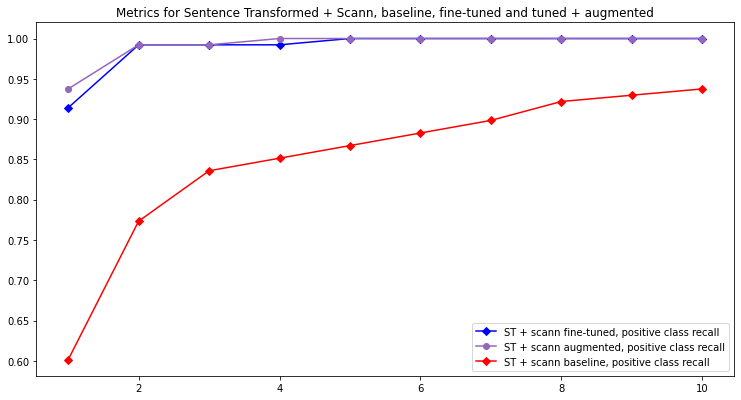

In [ ]:
import matplotlib.pyplot  as plt
import numpy as np


x = range(1, 11)


plt.plot(x, r_pos_tuned, '-bD',  label='ST + scann fine-tuned, positive class recall')
# plt.plot(x, r_neg_tuned, '-C0D',  label='ST fine-tuned, negative class recall')
# plt.plot(x, f1_tuned, '-C2D',  label='ST + scann fine-tuned, macro avg F1')

plt.plot(x, r_pos_aug, '-C4o',  label='ST + scann augmented, positive class recall')
# plt.plot(x, r_neg_aug, '-C6o',  label='ST augmented, negative class recall')
# plt.plot(x, f1_aug, '-mo',  label='ST + scann augmented, macro avg class F1')

plt.plot(x, r_pos_base, '-rD',  label='ST + scann baseline, positive class recall')

plt.legend()
plt.title('Metrics for Sentence Transformed + Scann, baseline, fine-tuned and tuned + augmented')
# plotting a line plot after changing it's width and height
fig = plt.gcf()
fig.set_size_inches(12.5, 6.5)
plt.show()

